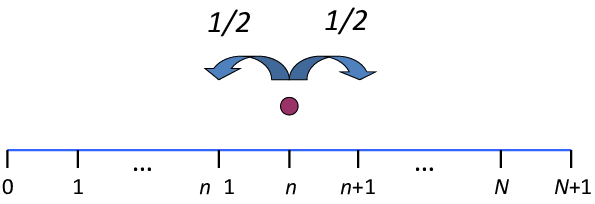

# Random Walk


As a physics student sometimes you see some random movement in nature like brownian motion(it's actually deterministic). we can use stochastic litrature to study brownian motion and find lots of valuable information about this process. Random walk is somehow one of the most instructive models that can help you understand how random process can model the nature.

for the beging let's see what random walk is. according to Wikipedia(https://en.wikipedia.org/wiki/Random_walk) random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

An elementary example of a random walk is the random walk on the integer number line, ${\displaystyle \mathbb {Z} }$ , which starts at 0 and at each step moves +1 or −1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas (see Brownian motion), the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.

We know that you are passionate and want to explore all details of these process(joke :) ) but for the begining let's start with the simplest model, one dimensional random walk with same probability for right and left step.

- [x] 1. the simplest model of random walk is a One-dimensional random walk, which starts at 0 and at each step moves +1 or −1 with equal probability. consider 10000_step 1d random walk. and use $10^5$ ensemble. in each ensemble begin from the origin(0) and record the endpoint at 10000th step. plot the PDF of these endpoints. also, calculate the first four moments of this PDF.

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

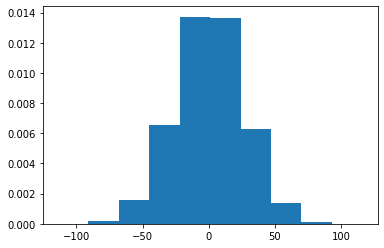

In [32]:
# بازم خیلی میطوله این
end= [sum( np.random.randint(0,3,(10**3)) -1 ) for i in range(10**5) ]
#print(end)
plt.hist(end,density=1);

- [x] now look at the plot you create. does it looklike a normal distribution? if yes isn't it strange cause we know that the probability is bionomial not guassian.


#explain here
گاوسین همون بایونومیال هست فقط وقتی داده های زیادی داشته باشیم
اثبات:
   https://people.bath.ac.uk/pam28/Paul_Milewski,_Professor_of_Mathematics,_University_of_Bath/Past_Teaching_files/stirling.pdf

- [x] 2.change the probability of jumping to right and left in a way that $P_{left} = 2 P_{right}$ and then repeat the process of Q1 again and evaluate the PDF and first four moments and cumulants. 

In [4]:
# بازم خیلی میطوله این
end= [sum( np.random.choice([-1,1],p=[.8,.2],size=1000) ) for i in range(10**5) ]
#print(end)


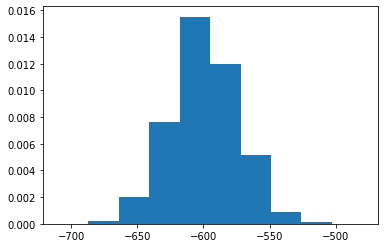

In [5]:
#a=plt.hist(end,density=1);
plt.hist(end,density=1)
a=np.histogram(end,density=1)
prob,steps=a[0],a[1][:-1]

In [6]:
cum=[0]*4
cum[0]= sum(end)/len(end)
cum[1]= np.mean( np.power(steps,2)*prob)- np.mean(steps*prob)**2
cum[2]= np.mean( np.power(steps,3)*prob)-3*np.mean( np.power(steps,2)*prob)*np.mean(steps*prob)+2*np.mean(steps*prob)**3
cum[3]= np.mean( np.power(steps,4)*prob)-4*np.mean( np.power(steps,3)*prob)*np.mean(steps*prob)-3*np.mean( np.power(steps,2)*prob)**2+12*np.mean( np.power(steps,2)*prob)*np.mean(steps*prob)**2-6*np.mean(steps*prob)**4

cum

[-600.02574, 1619.225864487045, -984414.8950916304, 594337510.8408663]

In [9]:
mome=[0]*4
mome[0]=cum[0]
mome[1]= cum[0]**2+cum[1]
mome[2]=cum[2]+3*cum[1]*cum[0]+cum[0]**3
mome[3]=cum[3]+4*cum[2]*cum[0]+3*cum[1]**2+6*cum[1]*cum[0]+cum[0]**4
mome

[-600.02574, 361650.1145270347, -219926946.88039234, 132581311619.57744]

- [ ] according to your result, can you tell how the shape of PDF function related to its cumulants?

In [ ]:
#explain here 
در مقایسه با نمودار قبلی
از نظر میانگین که به خاطر احتمال بیشتر چپ، به سمت منفی رفته 
از نظر واریانس قسمت چپ و راست با هم متفاوتن و دیگه مثل شکل قبل تاحد زیادی متقارن نیست که به خاطر تفاوت احتمال ها قابل انتظار بود
مقدار کامیولنت سوم هم به نظر تغییر خاصی نداشته چرا که تابع کشیده تر در نقاط انتهایی نشده
 (چی بنویسم دقیقا؟)

# Conditional Probability


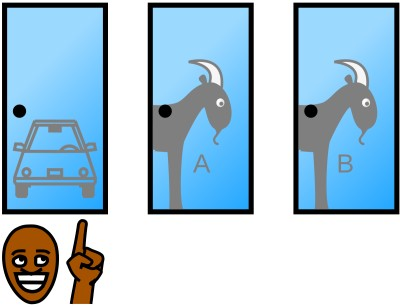

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? if Yes write a it's code to tell Us why and if your answer is No code it to prove the first group they are wrong:)

حل تحلیلی:
دری که من انتخاب کردم: m
دری که برام باز شد: d
دری که ماشین داره: c
i j k are numbers

whst we want: P(ck|mi,dj)
we know: P(a,b,c)=P(a,b)P(c|a,b)
and:
P(dj|cj,mj)=0
P(dj|cj,mi)=0
P(dj|ci,mi)=1/2
P(dj|ck,mi)=1
P(c,m)=P(c)P(m)
P(di|mj)=1/2

so:
P(ck|mi,dj)=P(ck,mi,dj)/ P(mi,dj) = P(dj|ck,mi) P(ck,mi) / P(dj|mi) P(mi) 


The time of execution of above program is : 0.13829612731933594
change: 3377 remain: 1709


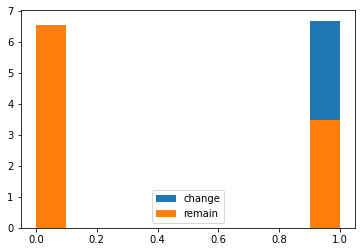

In [55]:
#code here حل عددی
import time
import random
import matplotlib.pyplot as plt

change=[]
remain=[]

start = time.time()

for i in range(10000):
    a=[1,2,3]
    #print(a)
    c= random.choice(a)
    #print('car:',c)
    m= random.choice(a)
    #print('m:',m)
    a.remove(m)
    if c==m:
        d=random.choice(a)
        a.remove(d)
        #print('c==m')
    elif c==a[0]:
        #d= a[1]
        a=a[0]
    else:
        #d= a[0]
        a=a[1]
    choice= random.choice([a,m])
    #print('choice:',choice,'d:',d)

    
    if choice==a:
        #print('----->Change')
        if a==c:
            change.append(1)
        else:
            change.append(0)
    
    if choice==m:
        #print('--->remain')
        if m==c:
            remain.append(1)
        else:
            remain.append(0)
            
end = time.time()
print("The time of execution of above program is :", end-start)
#print('change:',change,'remain:',remain)
print ('change:',change.count(1),'remain:',remain.count(1))



plt.hist(change,density=True,label='change');
plt.hist(remain,density=True, label='remain');
plt.legend(['change','remain'])
plt.show()


The time of execution of above program is : 0.01142263412475586


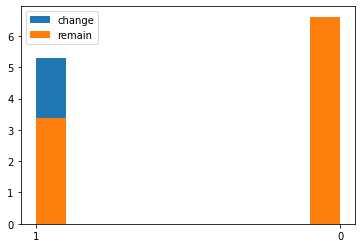

In [56]:
#another way but a lil faster 
import random
change=[]
remain=[]
car='1'
goat='0'
reward=[car,goat,goat]

start = time.time()

for i in range(1000):
    switch=random.randint(0,1)
    a=[1,2,3]
    random.shuffle(reward)
    m= random.choice(a)
    a=dict(zip(a,reward))
    m=a[m]
    #print('m:',m)
    #print(a)
    #print('m:',m)
    d= [x for x in a if x!=m and a[x]!=car ]
    d=random.choice(d)
    #print(d)
    a= [ a[x] for x in a if x!=m and x!=d ]
    #print('a:',a)
    change.append(a[0]) if switch else remain.append(m)
    #print(change,remain)
    
end = time.time()
print("The time of execution of above program is :", end-start)

plt.hist(change,density=True,label='change');
plt.hist(remain,density=True, label='remain');
plt.legend(['change','remain'])
plt.show()
    
    

# Centeral limit theorem

Choose a non-Gaussian distribution (uniform/bionomial/poission) and generate $10^5$ random variables for each of them.                                                      
                                                                                                          


- [x] a) plot the PDF of samples you created .     

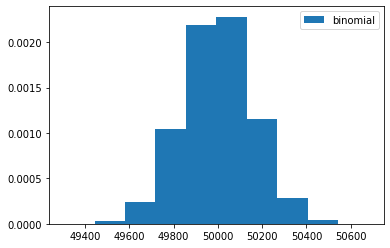

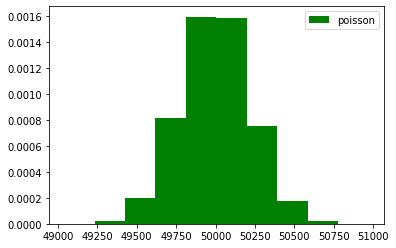

In [16]:
n=10**5
a=np.random.binomial(n,p=.5,size=(n))

plt.hist ( a , label='binomial',density=1);
plt.legend()
plt.show()

b= np.random.poisson(lam=.5*n,size=n)
plt.hist ( b , label='poisson',color='g',density=1);
plt.legend()
plt.show()


- [x] b) create $10^4$ random subset of length {2 , 5 , 10 , 20 , 100} from the first non-Gaussian distribution and caclculate mean of each subset, then plot the PDF of these means.           

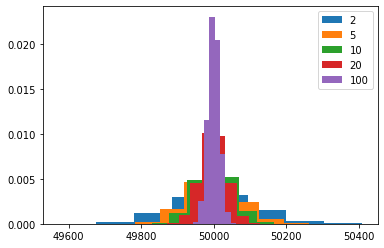

In [17]:
# کد رو باز نوشتم که معلوم شه :)
m=10**4
n=10**5
a=np.random.binomial(n,p=.5,size=(n))
y1= [  np.average( np.random.choice(a,size=(2)) ) for i in range(m) ]
y2= [  np.average( np.random.choice(a,size=(5)) ) for i in range(m) ]
y3= [  np.average( np.random.choice(a,size=(10)) ) for i in range(m) ]
y4= [  np.average( np.random.choice(a,size=(20)) ) for i in range(m) ]
y5= [  np.average( np.random.choice(a,size=(100)) ) for i in range(m) ]
plt.hist(y1,label='2',bins=8,density=1);
plt.hist(y2,label='5',bins=8,density=1);
plt.hist(y3,label='10',bins=8,density=1);
plt.hist(y4,label='20',bins=8,density=1);
plt.hist(y5,label='100',bins=8,density=1);
plt.legend()

- [ ] c) what do you understand form comparing the original distribution with those five?

همه گاوسی مانند هستند و میانگینشان یکسان شده ( با اینکه رندوم بوده و من انتظارش را نداشتم)
با انتخاب تعداد بیشتر از سمپل، واریانس نمودار کمتر میشود که درست است
احتمال میانگین خود نمودار اصلی از همه بیشتر است که درست است
نمودار 100تایی تقریبا به درستی واریانس را تخمین میزند

(چی بنویسم؟)

# Poission Approximation

- [x] Use python libraries to generate bionomial and poission distributions for different N’s (remember $\lambda =NP$). Over plot them for N = {5, 10, 20, 50, 100, 200, 1000}
How does it behave as N increases? 

همانطور که در شکل خواهیم دید، به هم شبیه تر میشوند


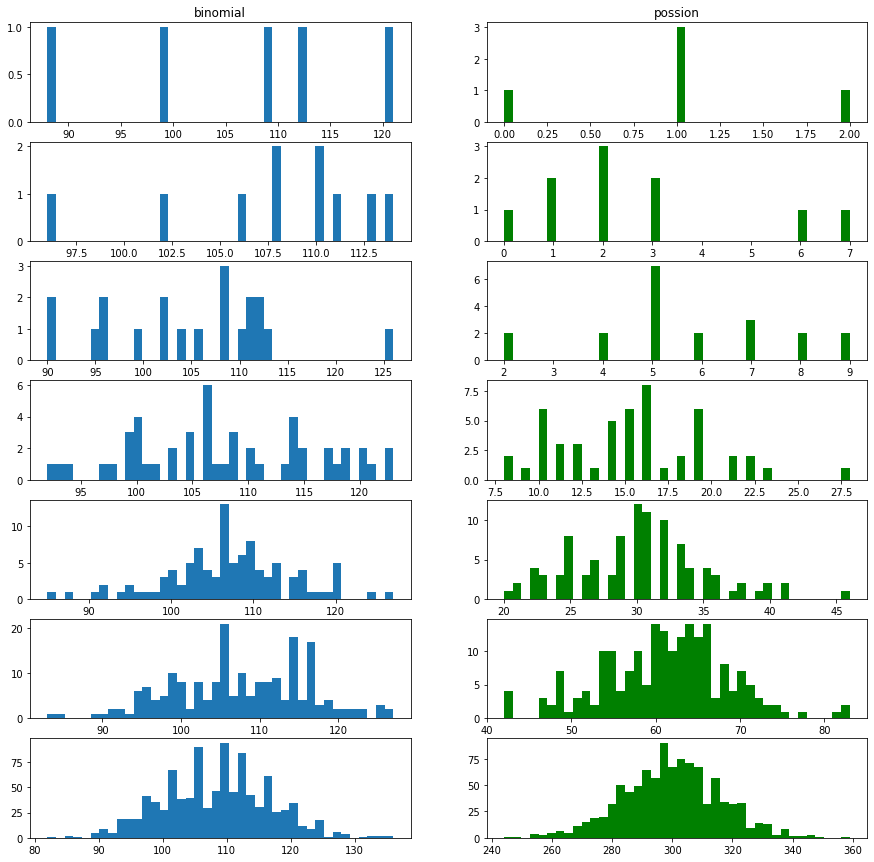

In [18]:
#code here
import math
import numpy as np
import random
import matplotlib.pyplot as plt

f, axs = plt.subplots(7,2,figsize=(15,15))
P=.3
N=[5, 10, 20, 50, 100, 200, 1000]
#bionomial

axs[0,0].set_title('binomial')
axs[0,1].set_title('possion')

for i in range(0,len(N)):
    x = np.random.binomial(n=360, p=P, size=N[i])
    axs[i,0].hist(x,bins=40)
    #plt.title("bionomia %s"% N[i])
    #plt.show()

#poission
for i in range(0,len(N)):
    y = np.random.poisson(lam=P*N[i], size=N[i])
    axs[i,1].hist(y,bins=40,color='g')
  


# Box Muller Method

1- generate Normal distribution from uniform distribution (Box-Muller algorithm(https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)- do not need to derive and prove it. the topic will be included in lectures in the following week). Normal= zero mean, unit variance    
- [x] a)Sample many points from this distribution. plot the pdf of the sample (plot hist).             
                              


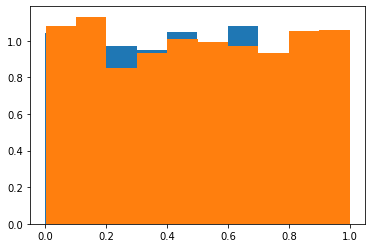

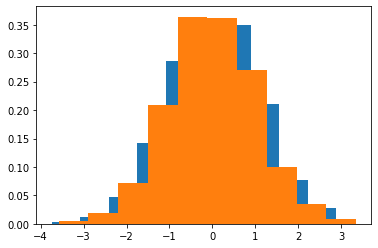

In [69]:
#code here
a= np.random.uniform(0,1,1000)
b= np.random.uniform(0,1,1000)
plt.hist(a,density=1);
plt.hist(b,density=1);
plt.show()


z1= np.sqrt(-2*np.log(a))*np.cos(2*np.pi*b)
z1prob=np.array( plt.hist(z1,density=1)[0] )
#print(z1prob)
z2= np.sqrt(-2*np.log(b))*np.sin(2*np.pi*a)
plt.hist(z2,density=1);

- [x] b)Calculate mean of the sample. Its variance.

In [80]:
#code here

meannz1= np.sum(z1)/len(z1)
varrz1= np.sum( (z1-meannz1)**2 )/ len(z1)
stddz1=np.sqrt(varrz1)

meanz1= np.average(z1)
varz1= np.var(z1)
stdz1=np.std(z1)
print(meannz1,meanz1)
print(varrz1,varz1)
print(stddz1,stdz1)

0.05334113833284902 0.05334113833284902
1.0362292213809852 1.0362292213809852
1.0179534475510092 1.0179534475510092


- [x] c)Overplot the pdf now, using this mean and variance (on the plot hist). Also use the mean and std deviation functions from python library. Do they agree? بله

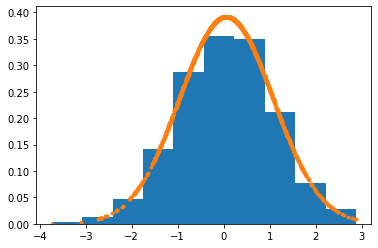

In [83]:
#code here


plt.hist(z1,density=1)
gaus= np.exp(-.5*np.power( (z1 - meannz1)/stddz1, 2) )/ (np.sqrt(2*np.pi) *stddz1)
plt.plot(z1,gaus,'.')

- [ ] d)Now that you have your Normal distribution, how can you turn it into a Gaussian distribution with  given mean and variance? For example mean=2, and std dev=4 ?   

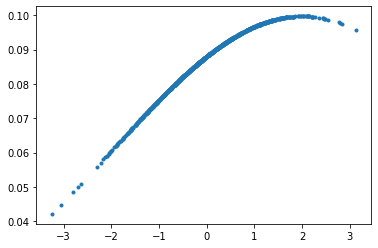

In [20]:
#code here
a= np.random.uniform(0,1,1000)
b= np.random.uniform(0,1,1000)
z1= np.sqrt(-2*np.log(a))*np.cos(2*np.pi*b)

meannz1=2
stddz1=4
gaus= np.exp(-.5*np.power( (z1 - meannz1)/stddz1, 2) )/ (np.sqrt(2*np.pi) *stddz1)
plt.plot(z1,gaus,'.')

there are two problems left, but you can choose one of them to solve.(we highly recommend you to solve both of them)

# Nice Matrix

A matrix of size n$\times$n which include numbers of {1,2,3,...,$n^2$} is called nice, if sum of all rows and columns  are the same. write a code that get n as a input and return a n$\times$n Nice Matrix. print out the examples of Nice Matrix for n = 4,5,6

In [ ]:
کدم کار نکرد بیخیالش شدم

# Honest and Liers

Suppose there 16 People sit around a circular table.  ٍEach claims that the two people next to him/her are liars. How many liars are there in the crowd? 

[11, 13, 9, 11, 9, 10, 10, 10, 12, 10, 9, 9, 10, 13, 10, 10, 10, 9, 11, 11, 10, 12, 11, 11, 10, 11, 10, 10, 10, 10, 12, 12, 10, 11, 11, 10, 10, 10, 13, 10, 12, 12, 10, 10, 12, 9, 12, 10, 10, 10, 10, 10, 11, 9, 9, 10, 10, 12, 9, 10, 11, 11, 9, 11, 11, 9, 10, 11, 13, 10, 11, 11, 11, 10, 12, 9, 11, 11, 11, 11, 10, 11, 12, 10, 10, 11, 11, 11, 10, 10, 11, 11, 11, 13, 9, 10, 9, 11, 11, 10]


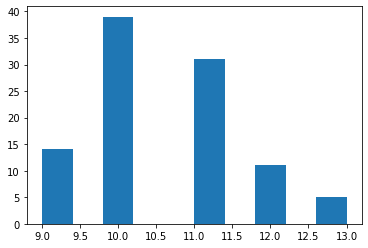

In [84]:
#code here 

n=16
liars=[]
for j in range (100):
    asum_of_answ=[]
    # ی نمونه رندوم درست میکنیم
    for i in range(0,n):
        lie=random.randint(0,1)
        asum_of_answ.append(lie)
    lie=[]
    # حلقه ای که نشستن رو درست میکنیم
    asum_of_answ.append(asum_of_answ[0])
    asum_of_answ.insert(0,asum_of_answ[-1])
    #print('secend:',asum_of_answ,len(asum_of_answ))

    #اولین و اخرین نفر حلقه رو چک میکنیم درست باشن و دیگه بهشون دست نمیزنیم
    if asum_of_answ[1]:
            if asum_of_answ[0]!=0 or asum_of_answ[2]!=0:
                asum_of_answ[1]=0
            elif asum_of_answ[0]==0 and asum_of_answ[2]==0:
                asum_of_answ[1]=1
    if asum_of_answ[-2]:
            if asum_of_answ[-3]!=0 or asum_of_answ[-1]!=0:
                asum_of_answ[-2]=0
            elif asum_of_answ[-3]==0 and asum_of_answ[-1]==0:
                asum_of_answ[-2]=1
    
    # یک دور میریم روی همه ادما غیر سر و ته حلقه میچرخیم که درستشون کنیم
    for i in range(2,len(asum_of_answ)-1):
        if asum_of_answ[i]:
            if asum_of_answ[i-1]!=0 or asum_of_answ[i+1]!=0:
                asum_of_answ[i]=0
        elif asum_of_answ[i-1]==0 and asum_of_answ[i+1]==0:
            asum_of_answ[i]=1
    
    # حلقه رو میشکونیم که دوباره 16 نفر رو به ترتیب داشته باشیم
    asum_of_answ.pop(0)
    asum_of_answ.pop(15)
    # دروغ گوها رو میشمریم!
    liars.append(asum_of_answ.count(0))
    
print(liars)
plt.hist(liars);